**D1DAE: Análise Estatística para Ciência de Dados (2021.1)** <br/>
IFSP Campinas

Profs: Ricardo Sovat, Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# Regressão Logística

## 1. Explorando o Dataset

Dataset fictício criado para determinar se um usuário comprou um dado produto ou não. <br/>
https://www.kaggle.com/rakeshrau/social-network-ads

### 1.1. Importando o Dataset

In [3]:
df = pd.read_csv('./datasets/Social_Network_Ads.csv')

In [4]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [6]:
df.columns = ['ID usuario', 'Genero', 'Idade', 'Salario', 'Comprado']
df.head()

,ID usuario,Genero,Idade,Salario,Comprado
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


### 1.2. Informações básicas do dataset

In [8]:
print(f'O dataset possui {df.shape[0]} exemplos/amostras/linhas e {df.shape[1]} atributos/variáveis/colunas')

O dataset possui 400 exemplos/amostras/linhas e 5 atributos/variáveis/colunas


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID usuario  400 non-null    int64 
 1   Genero      400 non-null    object
 2   Idade       400 non-null    int64 
 3   Salario     400 non-null    int64 
 4   Comprado    400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [11]:
df['Comprado'].unique()

array([0, 1])

### 1.3. Matriz de correlação

O **coeficiente de correlação** é uma medida que mede a associação linear entre duas variáveis. Seu valor varia de **_-1_** (associação negativa perfeita) e **_+1_** (associação positiva perfeita).

In [12]:
df.corr()

,ID usuario,Idade,Salario,Comprado
ID usuario,1.000000,-0.000721,0.071097,0.007120
Idade,-0.000721,1.000000,0.155238,0.622454
Salario,0.071097,0.155238,1.000000,0.362083
Comprado,0.007120,0.622454,0.362083,1.000000


## 2. Estimando um modelo de regressão logística - Com apenas uma única variável independente

Vamos começar com um problema mais simples, treinando um regressor logístico a partir de apenas **uma única variável independente** (_feature_).

### 3.1. Extraindo as variáveis independentes e dependentes

In [13]:
df.head()

,ID usuario,Genero,Idade,Salario,Comprado
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Criando um DataFrame para armazenar as variáveis independentes/explicativas (X)

In [17]:
X = df[['Idade']]  # matriz de características

In [18]:
X

,Idade
0,19
1,35
2,26
3,27
4,19
...,...
395,46
396,51
397,50
398,36


#### Criando uma Series para armazenar a variável dependente (y)

In [19]:
y = df['Comprado']  # vetor de labels/classes/rótulos

In [20]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Comprado, Length: 400, dtype: int64

### 3.2. Dividindo o dataset em Conjunto de Treinamento e Conjunto de Teste

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Verificando os tamanhos dos conjuntos de treino e teste

In [23]:
X.shape, y.shape

((400, 1), (400,))

In [24]:
X_train.shape, y_train.shape

((300, 1), (300,))

In [26]:
X_test.shape, y_test.shape

((100, 1), (100,))

In [27]:
X_train.head()

,Idade
250,44
63,32
312,38
159,32
283,52


In [28]:
X_test.head()

,Idade
132,30
309,38
341,35
196,30
246,35


#### Visualizando o conjunto de treinamento

<AxesSubplot:xlabel='Idade', ylabel='Comprado'>

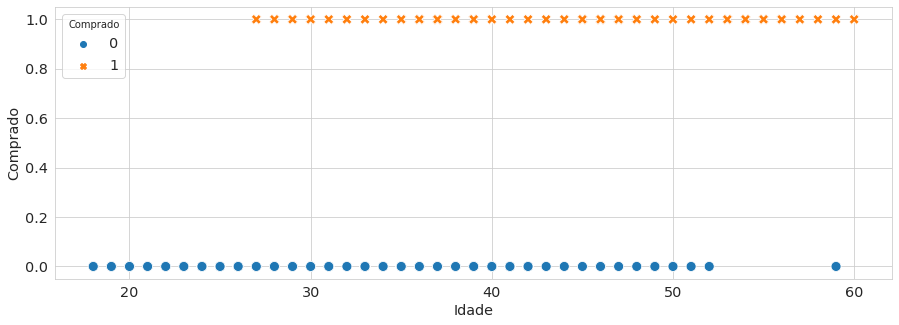

In [34]:
sns.scatterplot(x=X_train['Idade'], y=y_train, hue=y_train, style=y_train, s=100)

### 3.3. Treinando o modelo de Regressão Logística

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
classifier = LogisticRegression(random_state=0)

In [37]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

#### Modelo de Regressão Logística Aprendido

In [38]:
classifier.intercept_  # theta_0

array([-7.64451566])

In [39]:
classifier.coef_  # theta_1

array([[0.17938205]])

Portanto, os parâmetros aprendidos para nosso **modelo de regressão logística**, a partir do conjunto de treinamento utilizado, foi:

$\theta^T = [\theta_0, \theta_1] = [-7.64, 0.17]$

<span style="font-size: 20pt">
$
h_\theta(x) = \frac{1}{1 + e^{-\theta^{T}*x}} = \frac{1}{1 + e^{-(-7.64 + 0.17 * x_1)}}
$
</span>

### 3.4. Visualizando o Modelo

#### **Modelo de Regressão Logística Aprendido (Sigmoide)**

In [40]:
x_sig = X_train['Idade']
y_sig = classifier.predict_proba(X_train)[:, 1]  # retorna a probabilidade da amostra ser classificada como da classe positiva

#### **Modelo Linear com os Parâmetros Aprendidos**

In [41]:
x_line = X_train['Idade']
y_line = np.array(X_train) * classifier.coef_ + classifier.intercept_
y_line = y_line[:, 0]

#### **Decision boundary**

Como apenas uma variável dependente, a _decision boundary_ é uma reta vertical:

<span style='font-size: 20pt'>
$\theta_0 + \theta_1 * x_1 = 0$

$x_1 = \frac{-\theta_0}{\theta_1}$
</span>

In [42]:
theta_0 = classifier.intercept_[0]
theta_1 = classifier.coef_[0, 0]

In [43]:
decision_boundary = -theta_0 / theta_1
decision_boundary

42.615833026884616

A _decision boundary_ para o modelo aprendido é a reta representada por:
    
$x_1 = 42.615833026884616$

#### **Visualizando tudo junto**

In [44]:
train_indices = X_train.index
train_indices

Int64Index([250,  63, 312, 159, 283, 340,  81, 349, 153, 295,
            ...
            211,   9, 359, 195, 251, 323, 192, 117,  47, 172],
           dtype='int64', length=300)

In [45]:
df_train = df.iloc[train_indices]
df_train

,ID usuario,Genero,Idade,Salario,Comprado
250,15810075,Female,44,39000,0
63,15583681,Male,32,120000,1
312,15733964,Female,38,50000,0
159,15598840,Female,32,135000,1
283,15663249,Female,52,21000,1
...,...,...,...,...,...
323,15619465,Female,48,30000,1
192,15779581,Male,29,43000,0
117,15591433,Male,36,52000,0
47,15776348,Female,27,54000,0


Text(0.5, 1.0, 'Regressão Logística - TRAIN')

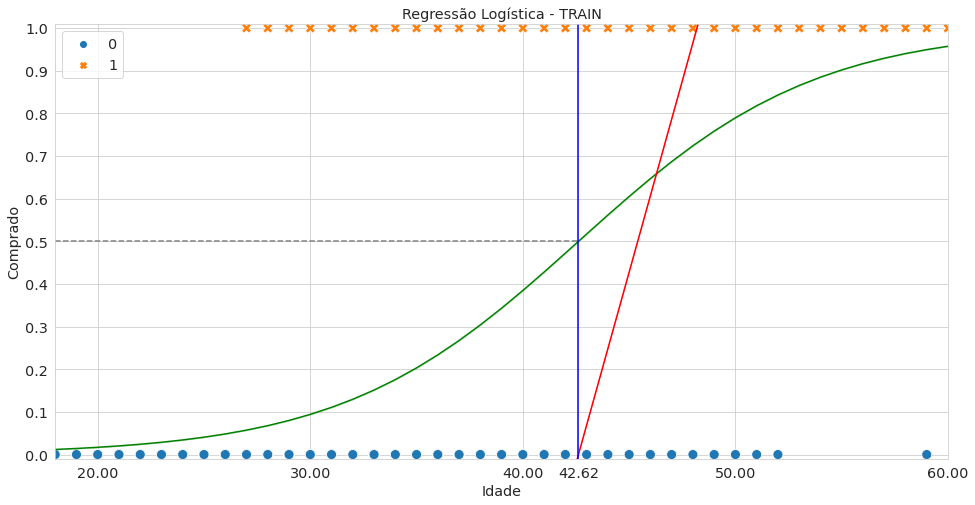

In [46]:
plt.figure(figsize=(16,8))

ax = sns.scatterplot(data=df_train, x='Idade', y='Comprado', style='Comprado', hue='Comprado', s=100)
sns.lineplot(x=x_sig, y=y_sig, color='green', ax=ax)
sns.lineplot(x=x_line, y=y_line, color='red', ax=ax)
plt.hlines(0.5, df_train['Idade'].min(), decision_boundary, colors='gray', linestyles='--')
plt.axvline(decision_boundary, color='blue')

x_ticks = np.append(ax.get_xticks(), decision_boundary)

ax.set_xticks(x_ticks)
plt.yticks(np.arange(0, 1.001, 0.1))
plt.xlim(df_train['Idade'].min(), df_train['Idade'].max())
plt.ylim(-0.01, 1.01)
plt.title('Regressão Logística - TRAIN')
# plt.legend(['modelo de regressão logística aprendido', 'modelo linear encontrado', 'decision boundary'])

## 4. Classificação / Predição

### 4.1. Predizendo se uma pessoa comprou o Produto

### 4.2. Predizendo os resultados do Conjunto de Teste

## 5. Métricas de Avaliação

### 5.1. Matriz de Confusão

<img src='imgs/confusion_matrix.png' width=250px/>

### 5.2. Precision / Recall

<img src='imgs/Precisionrecall.svg' width=300/>

_Selected elements_ são amostradas **classificadas** como da _Classe Positiva_. <br/>
_Relevant elements_ são amostradas cuja **classe verdadeira** é a _Classe Positiva_. <br/><br/>

<span style="font-size: 20pt">
$
precision = \frac{TP}{TP + FP}
$
</span>

_Dos itens classificados como positivo, quantos de fato são **verdadeiros positivos**?_ <br/>
_O quão preciso o classificador é ao classificar amostras como **positivas**?_ <br/>
_Ex: O quão preciso o classificador é nos pacientes que ele classificou com cancer?_ <br/><br/>

<span style="font-size: 20pt">
$
recall = sensitivity = true \space positive \space rate = \frac{TP}{FN+TP}
$
</span>

_Quantos **verdadeiros positivos** (proporção) foram classificados corretamente?_ <br/>
_Ex: O quão sensível o classificador é para classificar corretamente os pacientes que estão com cancer?_

### 5.3. Sensitivity / Specificity

<img src='imgs/Sensitivity_and_specificity.png'/>

<span style="font-size: 20pt">
$
sensitivity = recall = true \space positive \space rate = \frac{TP}{FN+TP}
$
</span>

_Quantos **verdadeiros positivos** (proporção) foram classificados corretamente?_ <br/>
_Ex: O quão sensível o classificador é para classificar corretamente os pacientes que estão com cancer?_ <br/><br/>

<span style="font-size: 20pt">
$
specificity = true \space negative \space rate = \frac{TN}{FN+TN}
$
</span>

_Quantas amostras classificadas como **negativas** são realmente **negativas**?_ <br/>
_Ex: Quantos pacientes saudáveis são identificados como não tendo cancer?_ <br/><br/>

### 5.4. Accuracy

<span style="font-size: 20pt">
$
accuracy = \frac{TP + TN}{TN + FN + FP + TP}
$
</span>

<br/>

_Qual foi a taxa de acerto (geral) da classificação?_

Foca nos **True Positives e True Negatives**. Não leva muito em conta os erros de classificação (FP e FN).

### 5.5. F1 score (Dice score)

<span style="font-size: 20pt">
$
F1 = 2 * \frac{precision \space * \space recall}{precision \space + \space recall}
$
</span>

#### Accuracy vs F1-Score
- _Accuracy_ é usada quando as taxas de **Verdadeiros Positivos** e **Verdadeiros Negativos** são mais importantes (taxas de acerto), enquanto _F1-score_ é usado quando as taxas de **Falsos Positivos** e **Falsos Negativos** são _cruciais_;
- _Accuracy_ pode ser usada quando a distribuição de classes das amostras de teste é _similar_, enquanto a _F1-score_ é uma métrica melhor quando há desbalanceamento de classes nas amostras de teste;
- Em problemas de classificação do "mundo real", o desbalanceamento de classes é comum, logo a _F1-score_ tende a ser uma métrica de avaliação mais interessante do que a _Accuracy_.

https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2#:~:text=Accuracy%20is%20used%20when%20the,as%20in%20the%20above%20case.

### 5.6. Juntando todas as métricas

In [ ]:
scores = pd.DataFrame({
    'Precision': [precision],
    'Recall / Sensitivity': [recall],
    'Specificity': [specificity],
    'Accuracy': [accuracy],
    'F1-score': [f1]
})
scores

## 6. Visualizando a classificação

In [ ]:
test_indices = X_test.index
test_indices

In [ ]:
df_test = df.iloc[test_indices]
df_test

In [ ]:
plt.figure(figsize=(16,8))

ax = sns.scatterplot(data=df_test, x='Idade', y='Comprado', style='Comprado', hue='Comprado', s=100)
sns.lineplot(x=x_sig, y=y_sig, color='green', ax=ax)
plt.hlines(0.5, X_test['Idade'].min(), decision_boundary, colors='gray', linestyles='--')
plt.axvline(decision_boundary, color='blue')

x_ticks = np.append(ax.get_xticks(), decision_boundary)

ax.set_xticks(x_ticks)
plt.yticks(np.arange(0, 1.001, 0.1))
plt.xlim(df_test['Idade'].min(), df_test['Idade'].max())
plt.ylim(-0.01, 1.01)
plt.title('Regressão Logística - TEST')
# plt.legend(['modelo de regressão logística aprendido', 'decision boundary'])